# 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

### (1) 데이터 가져오기

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target


In [2]:
df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y = pd.DataFrame(diabetes.target, columns=["MEDV"])

### (2) 모델에 입력할 데이터 x 준비하기

In [3]:
X_np = df_X.to_numpy()


### (3) 모델에 예측할 데이터 y 준비하기

In [4]:
y_np = df_y.to_numpy()

### (4) train 데이터와 test 데이터로 분리하기

In [5]:
from sklearn.model_selection import train_test_split

X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


### (5) 모델 준비하기

In [6]:
import numpy as np

W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

### (6) 손실함수 loss 정의하기

In [7]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

### (7) 기울기를 구하는 gradient 함수 구현하기

In [8]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

###  (8) 하이퍼 파라미터인 학습률 설정하기

In [9]:
LEARNING_RATE = 0.0001

### (9) 모델 학습하기

In [10]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
        

### (10) test 데이터에 대한 성능 확인하기

In [11]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

18877.360291627487

In [12]:
#너무 커서 learning rate 증가
LEARNING_RATE = 0.001

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3818.1457501505834

In [13]:
# 그래도 커서 다시 증가
LEARNING_RATE = 0.01

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2865.9218060722665

### (11) 정답 데이터와 예측한 데이터 시각화하기

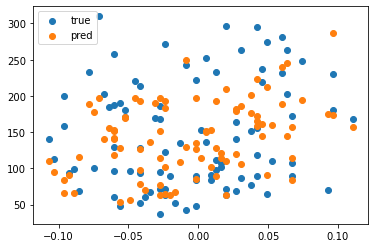

In [14]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.legend()
plt.show()

### X컬럼 변경해 보기

In [15]:
df_X = df_X[[
    'age', 'sex', 'bmi', 'bp', 's1'
]]

X = df_X.to_numpy()
y = diabetes.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42)

W = np.random.rand(5)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(5):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

LEARNING_RATE = 0.0001
losses = []

for i in range(1, 1001):
#    dW, db = gradient(X_train, W, b, y_train)
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

19052.07221372372

## 프로젝트2: 날씨 좋은 월요일 오후 세시, 자전거 타는 사람은 몇명?

### (1) 데이터 가져오기

In [16]:
import pandas as pd

bikes = pd.read_csv('~/aiffel/bike_regression/data/train.csv')


In [17]:
bikes["datetime"] = pd.to_datetime(bikes["datetime"])

### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [18]:
bikes["year"] = bikes["datetime"].dt.year
bikes["month"] = bikes["datetime"].dt.month
bikes["day"] = bikes["datetime"].dt.day
bikes["hour"] = bikes["datetime"].dt.hour
bikes["minute"] = bikes["datetime"].dt.minute
bikes["second"] = bikes["datetime"].dt.second


### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

<AxesSubplot:xlabel='second', ylabel='count'>

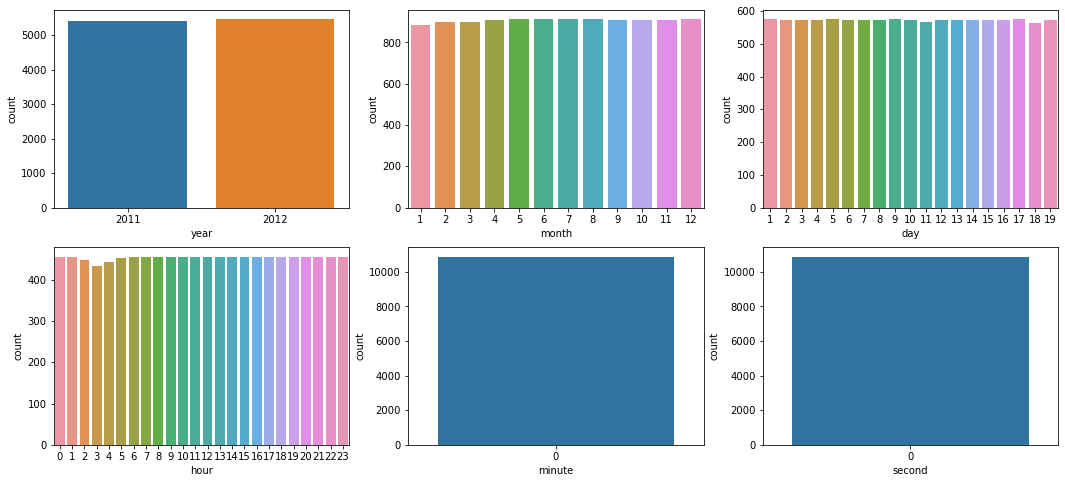

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.countplot(data=bikes, x="year", ax=ax1)
sns.countplot(data=bikes, x="month", ax=ax2)
sns.countplot(data=bikes, x="day", ax=ax3)
sns.countplot(data=bikes, x="hour", ax=ax4)
sns.countplot(data=bikes, x="minute", ax=ax5)
sns.countplot(data=bikes, x="second", ax=ax6)

### (4) X, y 컬럼 선택 및 train/test 데이터 분리

In [20]:
from sklearn.model_selection import train_test_split

X = bikes[["season", "holiday", "workingday", "weather", "temp", "atemp", "humidity", "windspeed", "year", "month", "day", "hour"]]
y = bikes[["count"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(8708, 12) (8708, 1)
(2178, 12) (2178, 1)


### (5) LinearRegression 모델 학습

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [22]:
predictions = model.predict(X_test)
predictions


array([[248.10627003],
       [ 48.79765547],
       [200.90676727],
       ...,
       [309.7528022 ],
       [ 38.17030198],
       [243.62697388]])

In [23]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse**(1/2) #RMSE

141.228078135169

### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

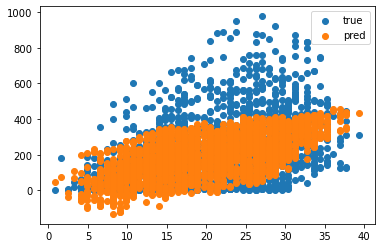

In [24]:
plt.scatter(X_test["temp"], y_test, label="true")
plt.scatter(X_test["temp"], predictions, label="pred")
plt.legend()
plt.show()

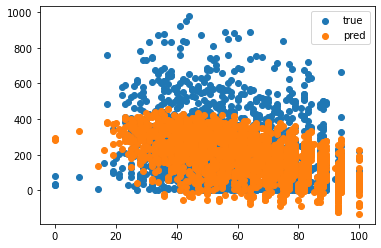

In [25]:
plt.scatter(X_test["humidity"], y_test, label="true")
plt.scatter(X_test["humidity"], predictions, label="pred")
plt.legend()
plt.show()

- 프로젝트 1에서는 learingin rate를 0.01로 설정했을 때, MSE 3000이하를 얻을 수 있었습니다.
- 프로젝트 2에서는 RMSE 150이하를 얻을 수 있었습니다.
- 데이터개수 시각화 및 예측결과 시각화를 진행하였으며, 예측과 실제 데이터가 크게 분리되지 않고 비슷하게 나타났습니다.